Shape: (891, 12)
   Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.70      0.70      0.70        56

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

Accuracy manual: 0.7622377622377622


Pclass  Sex  Survived
1       0    0            61
             1            40
        1    0             3
             1            82
2       0    0            84
             1            15
        1    0             6
             1            68
3       0    0           215
             1            38
        1    0            55
             1            47
dtype: int64

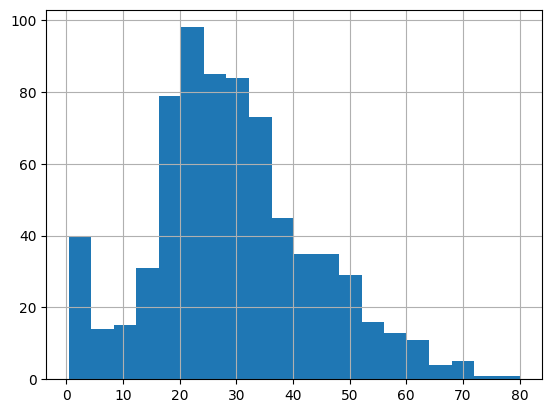

In [16]:
# titanic_baseline.ipynb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Carga de datos
df = pd.read_csv("./data/train.csv")
print(f"Shape: {df.shape}")
print(df[["Survived", "Pclass", "Sex", "Age", "Fare"]].head())

# Preprocesado básico
df = df[["Survived", "Pclass", "Sex", "Age", "Fare"]].dropna()
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

#Mostramos tabla
df["Age"].hist(bins=20)


X = df[["Pclass", "Sex", "Age", "Fare"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred))
print("Accuracy manual:", accuracy_score(y_test, y_pred))

df.groupby(["Pclass", "Sex", "Survived"]).size()
